In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
X = pd.read_csv('Xdata.csv', header = None)
X

,0,1
0,-1.213,-1.747
1,-0.003,0.115
2,0.456,-0.453
3,-0.596,-1.910
4,0.225,0.907
...,...,...
195,-0.817,-1.664
196,0.895,0.540
197,-0.445,-0.491
198,0.112,0.431


In [25]:
mu = X.mean(axis=0)
mu

0    0.054945
1    0.057860
dtype: float64

In [26]:
Xnew = X - mu
Xnew

,0,1
0,-1.267945,-1.80486
1,-0.057945,0.05714
2,0.401055,-0.51086
3,-0.650945,-1.96786
4,0.170055,0.84914
...,...,...
195,-0.871945,-1.72186
196,0.840055,0.48214
197,-0.499945,-0.54886
198,0.057055,0.37314


In [27]:
Sigma = X.T@X - mu@mu.T
Sigma

,0,1
0,113.376446,91.134564
1,91.134564,165.023075


In [28]:
# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(Sigma)

# Sort eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Print the sorted eigenvalues
print("Eigenvalues (largest to smallest):")
for eigenvalue in sorted_eigenvalues:
    print(eigenvalue)

# Print the corresponding eigenvectors
print("\nEigenvectors:")
for i in range(len(sorted_eigenvectors)):
    print("Eigenvector", i+1)
    print(sorted_eigenvectors[:, i])
    print()

Eigenvalues (largest to smallest):
233.92226271897152
44.47725881577853

Eigenvectors:
Eigenvector 1
[-0.60306687 -0.79769063]

Eigenvector 2
[-0.79769063  0.60306687]



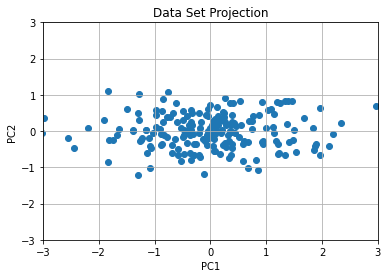

In [29]:
# Project the data onto the eigenvectors
projected_data = np.dot(Xnew, sorted_eigenvectors)

# Create a scatter plot
plt.scatter(projected_data[:, 0], projected_data[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Data Set Projection')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.grid(True)
plt.show()

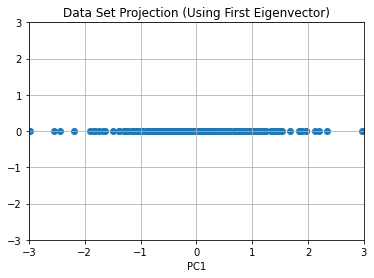

In [30]:
# Select the first eigenvector
selected_eigenvector = sorted_eigenvectors[:, 0]

# Project the data onto the selected eigenvector
projected_data = np.dot(Xnew, selected_eigenvector)

# Create a scatter plot
plt.scatter(projected_data, np.zeros_like(projected_data))
plt.xlabel('PC1')
plt.title('Data Set Projection (Using First Eigenvector)')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.grid(True)
plt.show()